In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [51]:
class LinearRegression:
  def __init__(self, degree):
    self._degree = degree

  def transform_X(self, x):
    self._x_original = x.reshape(-1, 1)
    self._X = np.ones((x.shape[0], 1))

    # Add x^i columns to x
    for i in range(1, self._degree + 1):
      self._X = np.hstack((self._X, self._x_original**i))
    return self._X
  
  def fit(self, x, y):
    self._X = self.transform_X(x)
    self._Y = y
    # Calculate w
    A = np.dot(self._X.T, self._X)
    b = np.dot(self._X.T, self._Y)
    self._W = np.dot(np.linalg.inv(A), b)

  def coef(self):
    return self._W
  
  def predict(self, x):
    return np.dot(self._X, self._W)
  
  def plot_model(self):
    x = np.linspace(float(min(self._x_original)), float(max(self._x_original)), 100)
    plt.plot(x, self.predict(self.transform_X(x)), 'r')

**1. Fit model parabol linear regression for data https://github.com/nttuan8/DL_Tutorial/master/L1/data_square.csv**

In [52]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv").values
data

array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ],
       [  42.069 , -437.099 ],
       [  44.4828, -469.56  ],
       [  46.8966, -490.369 ],
       [  49.3103, -499.524 ],
       [  51.7241, -497.027 ],
       [  54.1379, -482.878 ],
       [  56.5517, -457.075 ],
       [  58.9655, -419.62  ],
       [  61.3793, -370.511 ],
       [  63.7931, -309.75  ],
       [  66.2069, -237.337 ],
       [  68.6207, -153.27  ],
       [  71.0345,  -57.5505],
       [  73.4483,   49.8216],
       [  75.8621,  168.847 ],
       [  78.2759,  299.524 ],
       [  80.6897,  441.855 ],
       [  83.1034,  595.838 ],
       [  85.5172,  761.474 ],
       [  87.931 ,  938.763 ],
       [  90.3448, 1127.71  ],
       [  92.7586, 1328.3   ],
       [  95.1724, 1540.55  ],
       [  97.5862, 1764.45  ],
       [ 100.    , 2000.    ]])

Text(0, 0.5, 'Giá nhà')

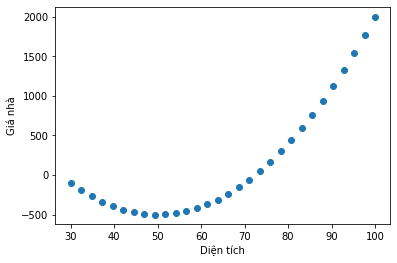

In [53]:
# Plot data
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')

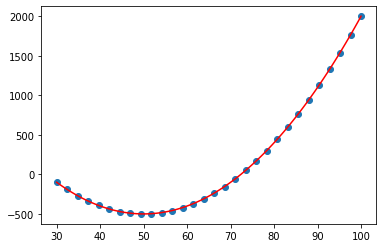

In [54]:
Model = LinearRegression(2)
Model.fit(x, y)
Model.plot_model()
plt.scatter(x, y)

**2.**

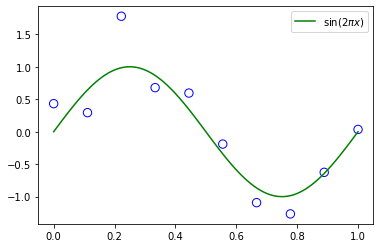

In [55]:
# Generate data for sine function with random noise e
def generate_data(n):
  x = np.linspace(0, 1, n)
  e = np.random.normal(0, 0.25, x.shape)
  y = np.sin(2*np.pi*x) + e
  return x, y

x_train, y_train = generate_data(10)
plt.scatter(x_train, y_train, 70, facecolor="none", edgecolor="b")
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)
plt.plot(x, y, c='g', label="$\sin(2\pi x)$")
plt.legend()

a. Fit polynomial has a degree of 0, 1, 3, 6, 9, plot model and comment

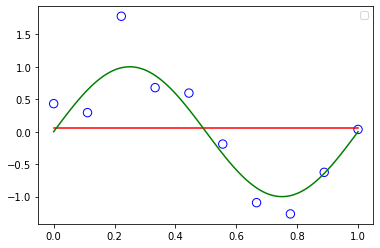

In [56]:
# Bac 0
Model0 = LinearRegression(0)
Model0.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Model0.plot_model()
plt.plot(x, y, c='g')
plt.legend()

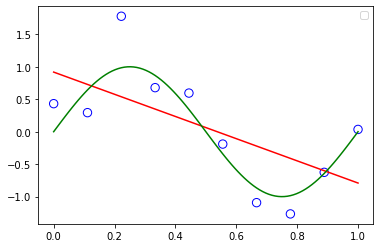

In [57]:
# Bac 1
Model1 = LinearRegression(1)
Model1.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Model1.plot_model()
plt.plot(x, y, c='g')
plt.legend()

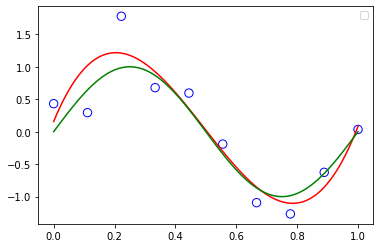

In [58]:
# Bac 3
Model3 = LinearRegression(3)
Model3.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Model3.plot_model()
plt.plot(x, y, c='g')
plt.legend()

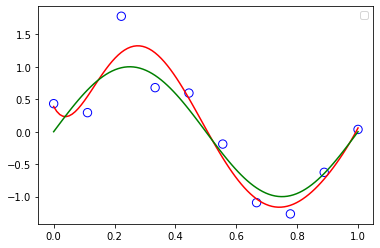

In [59]:
# Bac 6
Model6 = LinearRegression(6)
Model6.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Model6.plot_model()
plt.plot(x, y, c='g')
plt.legend()

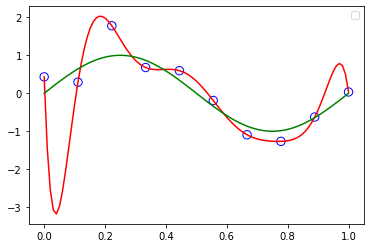

In [60]:
# Bac 9
Model9 = LinearRegression(9)
Model9.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Model9.plot_model()
plt.plot(x, y, c='g')
plt.legend()

When M = 0 and M = 1, model is underfitting. With M = 3, the model seems to be balanced. When increasing the degree to M = 6, the model has the sign of overfitting; with M = 9, the fitted curve passes through all the data points, which is overfitting.

b.Generate 15 and 100 more data points for polynomial has a degree of 9

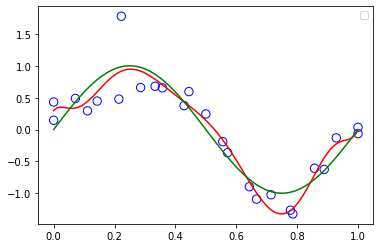

In [61]:
# 15 more data points
x_more, y_more = generate_data(15)
x_train_1 = np.concatenate((x_train, x_more), axis=0)
y_train_1 = np.concatenate((y_train, y_more), axis=0)
Model9.fit(x_train_1, y_train_1)
plt.scatter(x_train_1, y_train_1, 70, facecolor='None', edgecolor='b')
Model9.plot_model()
plt.plot(x, y, c='g')
plt.legend()

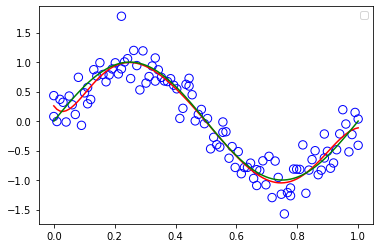

In [62]:
# 100 more data points
x_more, y_more = generate_data(100)
x_train_2 = np.concatenate((x_train, x_more), axis=0)
y_train_2 = np.concatenate((y_train, y_more), axis=0)
Model9.fit(x_train_2, y_train_2)
plt.scatter(x_train_2, y_train_2, 70, facecolor='None', edgecolor='b')
Model9.plot_model()
plt.plot(x, y, c='g')
plt.legend()

When adding more data points to the data sets, we can see that the overfitting problem is reduced. With 100 more data points, the overfitting situation is almost solved.

c. Ridge Regression and Lasso Regression

In [63]:
# Ridge Regression
class RidgeRegression:
  def __init__(self, degree, alpha):
    self._degree = degree
    self._alpha = alpha

  def transform_X(self, x):
    self._x_original = x.reshape(-1, 1)
    self._X = np.ones((x.shape[0], 1))

    # Add x^i columns to x
    for i in range(1, self._degree + 1):
      self._X = np.hstack((self._X, self._x_original**i))
    return self._X
  
  def fit(self, x, y):
    self._X = self.transform_X(x)
    self._Y = y
    I = np.identity(self._X.shape[1]) # identity matrix with dimensions (n+1)
    I[0][0] = 0                        # adjusting the first value in I to be 0, to account for the intercept term

    # Calculate w
    A = np.dot(self._X.T, self._X) + self._alpha * I
    b = np.dot(self._X.T, self._Y)
    self._W = np.dot(np.linalg.inv(A), b)
    
  def coef(self):
    return self._W
  
  def predict(self, x):
    return np.dot(self._X, self._W)
  
  def plot_model(self):
    x = np.linspace(float(min(self._x_original)), float(max(self._x_original)), 100)
    plt.plot(x, self.predict(self.transform_X(x)), 'g')

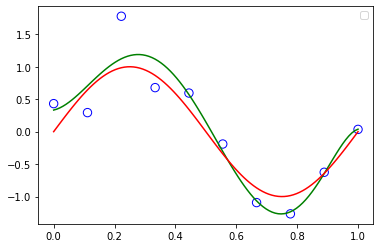

In [64]:
RG = RidgeRegression(9, 0.000001)
RG.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
RG.plot_model()
plt.plot(x, y, c='r')
plt.legend()

In [65]:
# Lasso Regression 
class LassoRegression() :  
    def __init__(self, degree, learning_rate, iterations, l1_penality):    
        self._degree = degree
        self._learning_rate = learning_rate    
        self._iterations = iterations    
        self._l1_penality = l1_penality

    def transform_X(self, x):
        self._x_original = x.reshape(-1, 1)
        self._X = np.ones((x.shape[0], 1))

        # Add x^i columns to x
        for i in range(1, self._degree + 1):
          self._X = np.hstack((self._X, self._x_original**i))
        return self._X
          
    def fit(self, X, Y) :  
        self._X = self.transform_X(X)   
        self._Y = Y    
        # no_of_training_examples, no_of_features       
        self._m, self._n = self._X.shape        
        # weight initialization      
        self._W = np.zeros(self._n)  
        self._b = 0  

        # gradient descent learning              
        for i in range(self._iterations):        
            self.update_weights()    
        return self
      
    # Helper function to update weights in gradient descent     
    def update_weights(self) :          
        Y_pred = self.predict(self._X)
      
        # calculate gradients       
        dW = np.zeros(self._n)     
        for j in range(self._n):     
            if self._W[j] > 0:            
                dW[j] = (-(2 * (self._X[:, j]).dot(self._Y - Y_pred )) + self._l1_penality)/self._m
            else :         
                dW[j] = (-(2 * (self._X[:, j]).dot(self._Y - Y_pred)) - self._l1_penality)/self._m    
        db = - 2 * np.sum(self._Y - Y_pred )/self._m 
          
        # update weights 
        self._W = self._W - self._learning_rate * dW  
        self._b = self._b - self._learning_rate * db
    
        return self
      
    def predict(self, X) :    
        return X.dot(self._W) + self._b
    
    def plot_model(self):
      x = np.linspace(float(min(self._x_original)), float(max(self._x_original)), 100)
      plt.plot(x, self.predict(self.transform_X(x)), 'r')

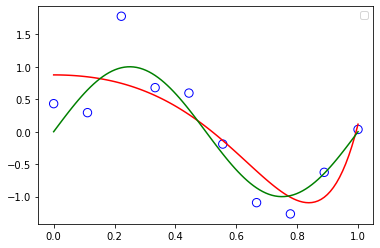

In [66]:
Lasso = LassoRegression(9, 0.01, 10000, 0.000001)
Lasso.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Lasso.plot_model()
plt.plot(x, y, c='g')
plt.legend()